### Function to Load Graph Data from a File

The **`load_from_files(file)`** function initializes a graph from a text file containing a **list of edges**. Each line in the file represents an edge between two vertices.

#### Description:

- **Parameters**:
  - `file` (str): Path to the text file with the graph's edge list, formatted as two integers per line representing connected vertices.
- **Returns**:
  - `edges_list` (list of lists): A list of edges, where each edge is a pair of vertex IDs.
  - `vertices` (list of int): A list of unique vertex IDs present in the graph. **Vertices are numbered sequentially starting from 0**.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Open a text file and read the list of edges
def load_from_files(file):
    edges_list = []
    with open(file, "r") as f:
        for line in f:
            edges_list.append([int(line.strip().split()[0]), int(line.strip().split()[1])])

    vertices = list(set([vertex for edge in edges_list for vertex in edge]))
    return edges_list, vertices


edges_list, vertices = load_from_files("/content/slide_example_1_edge_list.txt")
print(f"List of Vertices (numbered): {vertices}")
print(f"List of Edges: {edges_list}")

List of Vertices (numbered): [0, 1, 2, 3, 4, 5]
List of Edges: [[0, 3], [0, 4], [1, 2], [1, 4], [1, 5], [2, 5], [3, 4]]


### Data Structures in the KL Algorithm Implementation

This section introduces three primary data structures used to represent and manipulate a graph for the Kernighan–Lin (KL) algorithm, a heuristic method for partitioning a graph into two subsets to minimize the edge cut between them.

1. **`Vertex` Class**: Represents a vertex (node) in the graph.
2. **`Edge` Class**: Represents an edge connecting two vertices.
3. **`Graph` Class**: Represents the entire graph, which is composed of vertices and edges.

Each data structure is implemented as a Python class with specific attributes and methods to encapsulate the properties and behaviors associated with vertices, edges, and the graph as a whole.

#### 1. `Vertex` Class

The `Vertex` class represents a single vertex in the graph. It contains information about the vertex ID and the edges connected to it. Additionally, it provides methods to manage edges and compute the "D-value," which is essential for the KL algorithm.

- **Attributes**:
  - `id`: (int) The unique identifier for the vertex.
  - `edges`: (list of `Edge`) A list of edges connected to the vertex.
  
- **Methods**:
  - `__init__(self, id, edges=[])`: Initializes a vertex with a unique ID and an optional list of edges.
  - `add_edge(self, edge)`: Adds an edge to the vertex's edge list if it is not a duplicate (in case of an undirected graph).
  - `__repr__(self)`: Returns a string representation of the vertex and its connected edges for display purposes.
 <!-- - `get_D_value(self)`: Computes the "D-value" of the vertex, which is the difference between external and internal edge costs. -->
  

#### 2. `Edge` Class

The `Edge` class represents an edge in the graph. An edge connects two vertices, identified by their unique IDs.

- **Attributes**:
  - `left_id`: (int) The ID of the vertex on one side of the edge.
  - `right_id`: (int) The ID of the vertex on the other side of the edge.

- **Methods**:
  - `__init__(self, left_id, right_id)`: Initializes an edge with the IDs of the two vertices it connects.
  - `__repr__(self)`: Returns a string representation of the edge, displaying the connected vertex IDs.

#### 3. `Graph` Class

The `Graph` class represents the entire graph structure, containing multiple vertices and edges. It is responsible for managing the connections between vertices and edges, visualizing the graph, and computing partition costs.

- **Attributes**:
  - `vertices`: (list of `Vertex`) A list of all vertices in the graph.
  - `edges`: (list of `Edge`) A list of all edges in the graph.
  
- **Methods**:
  - `__init__(self, vertices, edges)`: Initializes the graph with a given list of vertices and edges, and connects each vertex to its associated edges.
  - `visualize(self, partition_dict={})`: Visualizes the graph using the NetworkX library.
    - **Parameters**:
      - `partition_dict` (dict, optional): A dictionary mapping each vertex ID to its partition label ("A" or "B"). If provided, nodes are colored based on their partitions, and edges between different partitions are displayed as dashed lines; otherwise, all nodes are shown in the default color.

By defining these data structures, we create a flexible representation of the graph.

In [17]:
class Vertex:
    def __init__(self, id, edges=[]):
        self.id = id
        self.edges = []

    def add_edge(self, edge):

        # undirected graph, ignore reverse direction
        for present_edge in self.edges:
            if present_edge.left_id == edge.right_id and present_edge.right_id == edge.left_id:
                return

        self.edges.append(edge)


    def __repr__(self):
        display_string =  ""
        for i, edge in enumerate(self.edges):
            display_string = display_string + f"{edge.__repr__()}\n" if i < len(self.edges)-1 else display_string + f"{edge.__repr__()}"
        # String representation for end-users
        return f"{self.id}\n"+display_string

class Edge:
    # left_id, right_id
    def __init__(self, left_id, right_id):
        self.left_id = left_id
        self.right_id = right_id

    def __repr__(self):
        # String representation for end-users
        return f"({self.left_id})--({self.right_id})"

class Graph:
    # vertices, edges
    def __init__(self, vertices, edges):
        self.vertices = vertices
        self.edges = edges

        # connect vertices and edges
        vertex_dict = {v.id: v for v in self.vertices}

        for edge in self.edges:
            edge.left_v = vertex_dict[edge.left_id]
            vertex_dict[edge.left_id].add_edge(edge)

            edge.right_v = vertex_dict[edge.right_id]
            vertex_dict[edge.right_id].add_edge(edge)

    def visualize(self, partition_dict={}):
        G = nx.Graph()
        G.add_nodes_from([vertex.id for vertex in self.vertices])
        G.add_edges_from([[edge.left_id, edge.right_id] for edge in self.edges])

        if not partition_dict:
            nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=16, font_color='black', edge_color='black')
        else:
            partition_map = ['yellow' if partition_dict[vertex] == "A" else 'skyblue' for vertex in vertices]
            # Define edge styles based on partition
            edge_styles = []
            for u, v in G.edges():
                if partition_dict[u] != partition_dict[v]:
                    edge_styles.append('dashed')  # Edges between different partitions
                else:
                    edge_styles.append('solid')   # Edges within the same partition
            # Get positions for the nodes
            pos = nx.spring_layout(G)

            # Draw nodes with different colors for each partition
            nx.draw_networkx_nodes(G, pos, node_color=partition_map, node_size=1000)

            # Draw labels
            nx.draw_networkx_labels(G, pos, font_size=16, font_color='black')

            # Draw edges with different styles
            nx.draw_networkx_edges(G, pos, style=edge_styles, width=2, edge_color='black')

        plt.show()


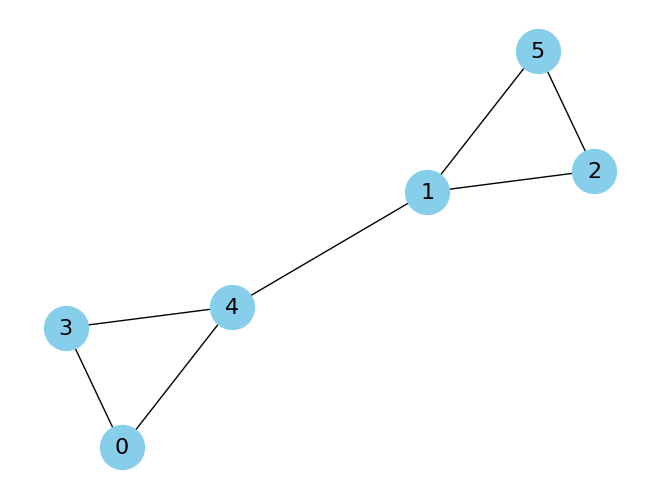

In [18]:
## Initialize the graph from the list of edges and vertices:
vertices_obj = [Vertex(vertex) for vertex in vertices]
edges_obj = [Edge(left_id, right_id) for left_id, right_id in edges_list]

g = Graph(vertices_obj, edges_obj)
g.visualize()

### Initialize and Construct the Graph

The above code initializes the graph structure by creating objects for vertices and edges, and then builds the complete graph:

- **`vertices_obj`**: Creates a list of `Vertex` objects for each unique vertex ID in `vertices`.
- **`edges_obj`**: Creates a list of `Edge` objects for each pair of vertex IDs in `edges_list`.
- **`g = Graph(vertices_obj, edges_obj)`**: Constructs the graph by connecting the vertices and edges using the `Graph` class, which manages their relationships and prepares the graph for further operations.
- **`g.visualize()`**: Visualizes the graph using the NetworkX library to display nodes and edges with labels and colors.

### Function to Initialize the Graph Partition

The **`initialize_partition(vertices)`** function divides the vertices of a graph into two groups, "A" and "B". Assigns "A" to the first half and "B" to the second half of the vertices.

#### Description:

- **Parameters**:
  - `vertices` (list of `Vertex` objects): The graph's vertices.
- **Returns**:
  - `partition_dict` (dict): A dictionary mapping each vertex ID to a partition label ("A" or "B").

Initial Partition: {0: 'A', 1: 'A', 2: 'A', 3: 'B', 4: 'B', 5: 'B'}


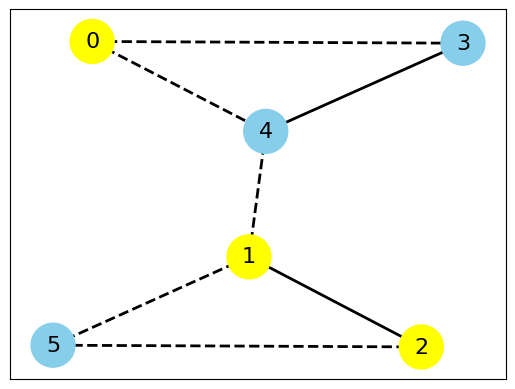

In [19]:
def initialize_partition(vertices):
    # Calculate the midpoint once to avoid repeated calculations
    midpoint = len(vertices) // 2

    # Loop through all vertices and assign partition labels based on their index
    partition_dict = {vertex.id: ("A" if i < midpoint else "B") for i, vertex in enumerate(vertices)}

    return partition_dict

partition_dict = initialize_partition(g.vertices)
print(f"Initial Partition: {partition_dict}")
g.visualize(partition_dict)

# Your work starts from here!

### Function to Calculate Partition Cut Cost

The **`get_partition_cost(edges, partition_dict)`** function calculates the cut cost of a graph partition. It counts the number of edges that connect nodes from different partitions.

#### Description:

- **Parameters**:
  - `edges` (list of `Edge` objects): The list of edges in the graph.
  - `partition_dict` (dict): A dictionary mapping each vertex ID to its partition label ("A" or "B").
- **Returns**:
  - `cut_cost` (int): The total number of edges that connect nodes between different partitions, representing the cost of the partition.

In [20]:
def get_partition_cost(edges, partition_dict):
    cut_cost = 0
    # Write your code here ....
    for edge in edges:
        if partition_dict[edge.left_id] != partition_dict[edge.right_id]:
            cut_cost += 1
    return cut_cost


print(f"Initial Partition Cost: {get_partition_cost(g.edges, partition_dict)}")

Initial Partition Cost: 5


### Functions to Compute D-Values for All Vertices

1. **`get_D_values(vertex, partition_dict)`**:
   - Calculates the D-value for a given vertex, representing the net cost difference between edges connected to different partitions.
   - **Returns**:
     - `cost` (int): D-value of the vertex (`+1` for each edge to a different partition, `-1` for edges within the same partition).

2. **`get_all_D_values(vertices, partition_dict)`**:
   - Computes the D-values for all vertices and groups them by their partition labels.
   - **Returns**:
     - `costs` (dict): A dictionary where each partition label ("A" or "B") maps to a sub-dictionary of vertex IDs and their corresponding D-values.

In [21]:
def get_D_values(vertex, partition_dict):
    cost = 0
    # Write your code here ....
    for edge in vertex.edges:
        if vertex.id == edge.left_id:
            connected_node_id = edge.right_id
        else:
            connected_node_id = edge.left_id

        if partition_dict[vertex.id] != partition_dict[connected_node_id]:
            cost += 1
        else:
            cost -= 1
    return cost

def get_all_D_values(vertices, partition_dict):
    costs = {}
    # Write your code here ....
    for vertex in vertices:
        d_value = get_D_values(vertex, partition_dict)
        partition_label = partition_dict[vertex.id]

        if partition_label not in costs:
            costs[partition_label] = {}

        costs[partition_label][vertex.id] = d_value

    return costs


vertices_cost = get_all_D_values(g.vertices, partition_dict)
print(f"{vertices_cost}")

{'A': {0: 2, 1: 1, 2: 0}, 'B': {3: 0, 4: 1, 5: 2}}


### Function to Calculate the Gain for a Swapping Pair

The **`calculate_gain_pair(edges, vertices, partition_dict)`** function identifies the pair of vertices, one from each partition, whose swap results in the maximum gain. The gain is calculated based on the difference in costs before and after the swap.

#### Description:

- **Parameters**:
  - `edges` (list of `Edge` objects): The list of all edges in the graph.
  - `vertices` (list of `Vertex` objects): The list of all vertices in the graph.
  - `partition_dict` (dict): A dictionary mapping each vertex ID to its partition label ("A" or "B").

- **Returns**:
  - `max_gain` (float): The maximum gain achieved by swapping a pair of vertices between partitions.
  - `pair` (list of two int): The vertex IDs of the pair that yields the maximum gain when swapped.

In [22]:
def calculate_gain_pair(edges, vertices, partition_dict):
    c_ab = 0  # c_ab indicates the number of directly connected edges between two vertices.
    parts = sorted(list(set(partition_dict.values())))
    # Get D-values for all vertices grouped by partitions
    vertices_cost = get_all_D_values(vertices, partition_dict)

    pair = []
    max_gain = -1 * float("inf")  # Initialize max gain to a very low value

    # Iterate over all pairs to find gain. Update max_gain if it is greater than initial value
    group_a = [vertex_id for vertex_id in vertices_cost[parts[0]].keys()]
    # group_a = [0, 1, 2, 3] ... (List of vertex IDs that are in partition A)
    group_b = [vertex_id for vertex_id in vertices_cost[parts[1]].keys()]
    # group_a = [4, 5, 6, 7] ... (List of vertex IDs that are in partition B)

    for a in group_a:
        for b in group_b:
            c_ab = (a, b) in [(edge.left_id, edge.right_id) for edge in edges]

            # write your code here
            gain = vertices_cost[parts[0]][a] + vertices_cost[parts[1]][b] - 2 * c_ab

            if gain > max_gain:
                max_gain = gain
                pair = [a, b]

    return max_gain, pair

max_gain, pair = calculate_gain_pair(g.edges, g.vertices, partition_dict)
print(f"1st iteration gain: {max_gain}")
print(f"1st iteration swapped pair: {(pair[0], pair[1])}")

1st iteration gain: 4
1st iteration swapped pair: (0, 5)


### Description of Kernighan-Lin Algorithm Implementation

The code implements the **Kernighan-Lin (KL) Algorithm** to optimize the partition of a graph into two subsets, minimizing the edge cut between them.

#### Key Steps:

1. **Initialization**:
   - Creates vertex and edge objects and initializes the graph (`g`).
   - Sets the initial partition using `initialize_partition`.

2. **Algorithm Passes**:
   - The outer `while` loop continues until no further gain (`G_m > 0`) or a maximum of 5 passes is reached (`p < 5`).

3. **Inner Loop for Gain Calculation**:
   - Iterates over half the vertices (`i < len(g.vertices) // 2`), calculating the maximum gain for each iteration.
   - **`G`**: Tracks the cumulative gain for each iteration.
   - **`partition_history`**: Stores the partition states for each iteration.
   - **`max_gain`** and **`pair`**: Determine the best pair of vertices to swap.
   - Updates the partition after each swap and removes swapped vertices from further consideration.

4. **Determine Best Partition per Pass**:
   - Calculates the iteration (`m`) that achieved the maximum gain (`G_m`) in the current pass.
   - Updates the partition to the state that achieved the maximum gain.

5. **Visualization and Output**:
   - Visualizes the best partition after each pass and outputs the results.

#### Loop Variables:

- **`p`**: Tracks the current pass number.
- **`i`**: Iteration counter within each pass.
- **`G`**: List of cumulative gains for each iteration.
- **`G_m`**: Maximum cumulative gain achieved in a pass.
- **`partition_history`**: Stores the partition state after each iteration to find the best state with the maximum gain.

#### Final Output:

- Prints the total number of passes, the final gain (`G_m`), and the best partition found.
- Visualizes the final partition.

Pass 1
-------
Partition: {0: 'A', 1: 'A', 2: 'A', 3: 'B', 4: 'B', 5: 'B'}
Partition Cost: 5
1 iteration gain: 4
1 iteration swapped pair: (0, 5)
Current Gain List: [4]
-----
Partition: {0: 'B', 1: 'A', 2: 'A', 3: 'B', 4: 'B', 5: 'A'}
Partition Cost: 1
2 iteration gain: -3
2 iteration swapped pair: (1, 3)
Current Gain List: [4, 1]
-----
Partition: {0: 'B', 1: 'B', 2: 'A', 3: 'A', 4: 'B', 5: 'A'}
Partition Cost: 4
3 iteration gain: -1
3 iteration swapped pair: (2, 4)
Current Gain List: [4, 1, 0]
-----
Max Gain Achieved in pass 1: Gm = 4
Best Partition for pass: {0: 'B', 1: 'A', 2: 'A', 3: 'B', 4: 'B', 5: 'A'}


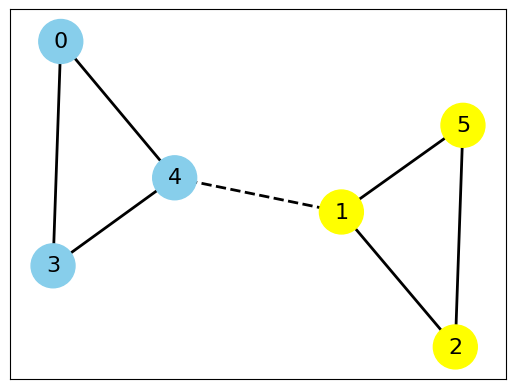



Pass 2
-------
Partition: {0: 'B', 1: 'A', 2: 'A', 3: 'B', 4: 'B', 5: 'A'}
Partition Cost: 1
1 iteration gain: -3
1 iteration swapped pair: (1, 0)
Current Gain List: [-3]
-----
Partition: {0: 'A', 1: 'B', 2: 'A', 3: 'B', 4: 'B', 5: 'A'}
Partition Cost: 4
2 iteration gain: 0
2 iteration swapped pair: (2, 3)
Current Gain List: [-3, -3]
-----
Partition: {0: 'A', 1: 'B', 2: 'B', 3: 'A', 4: 'B', 5: 'A'}
Partition Cost: 4
3 iteration gain: 3
3 iteration swapped pair: (5, 4)
Current Gain List: [-3, -3, 0]
-----
Max Gain Achieved in pass 2: Gm = 0
Best Partition for pass: {0: 'A', 1: 'B', 2: 'B', 3: 'A', 4: 'A', 5: 'B'}


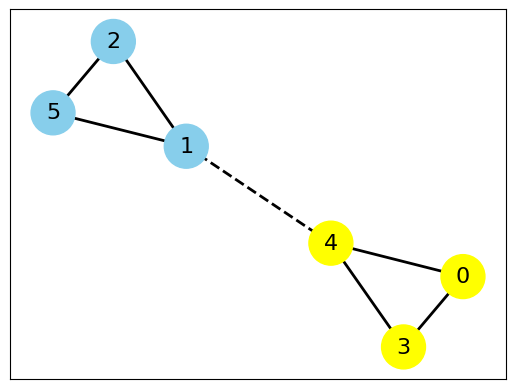



Algorithm completed: No. of Passes: 2. Final Gm = 0
Best Partition: {0: 'A', 1: 'B', 2: 'B', 3: 'A', 4: 'A', 5: 'B'}


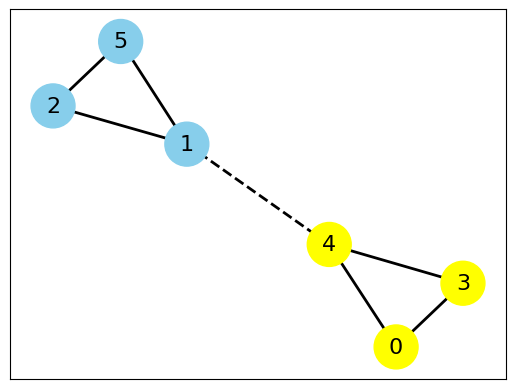

In [23]:
# Initialize vertices and edges
vertices_obj = [Vertex(vertex) for vertex in vertices]
edges_obj = [Edge(left_id, right_id) for left_id, right_id in edges_list]

# Create the graph
g = Graph(vertices_obj, edges_obj)

# Initialize the partition
partition_dict = initialize_partition(g.vertices)

# Start the Kernighan-Lin Algorithm Pass
G_m = 1000  # Initial cumulative gain
max_pass = 10  # Manual reset. For your debugging purposes.
p = 0  # Pass counter

while G_m > 0 and p < max_pass:
    G = []  # List to track maximum cumulative gains for each iteration
    partition_history = []  # List to track the partitions in each pass.

    p += 1  # Increment pass count
    print(f"Pass {p}")
    print(f"-------")

    i = 0  # Iteration counter
    temp_vertices = g.vertices.copy()  # Temporary list of vertices for processing

    while i < len(g.vertices) // 2:
        ## Write your code here .......
        ## Place the appropriate variables in the print commands below (in place of .... )
        print(f"Partition: {partition_dict}")
        print(f"Partition Cost: {get_partition_cost(g.edges, partition_dict)}")

        # Calculate D-values and find the best gain pair
        vertices_cost = get_all_D_values(temp_vertices, partition_dict)  # Calculate D-values
        max_gain, pair = calculate_gain_pair(g.edges, temp_vertices, partition_dict)  # Find max gain pair

        print(f"{i + 1} iteration gain: {max_gain}")
        print(f"{i + 1} iteration swapped pair: {(pair[0], pair[1])}")

        # Update gain list and swap the pairs
        if len(G)==0:
          G.append(max_gain)
          print(f"Current Gain List: {G}")
        else:
          cumulative_gain = G[-1] + max_gain
          G.append(cumulative_gain)
          print(f"Current Gain List: {G}")

        # Perform swap and store the partition using the partition_dict variable.
        partition_dict[pair[0]], partition_dict[pair[1]] = partition_dict[pair[1]], partition_dict[pair[0]]
        partition_history.append(partition_dict.copy())

        # Exclude swapped vertices from further remaining iterations in the pass
        temp_vertices = [vertex for vertex in temp_vertices if vertex.id not in pair]
        print("-----")
        i += 1

    # Find the iteration for which maximum gain was achieved in the p-th pass
    m = G.index(max(G)) if G else 0  ## Write your code here .......
    G_m = G[m] if G else 0  # Update G_m
    partition_dict = partition_history[m]  # Update partition

    print(f"Max Gain Achieved in pass {p}: Gm = {G_m}")
    print(f"Best Partition for pass: {partition_dict}")
    g.visualize(partition_dict)
    print("\n")

print(f"Algorithm completed: No. of Passes: {p}. Final Gm = {G_m}")
print(f"Best Partition: {partition_dict}")
g.visualize(partition_dict)
